In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [4]:

data = pd.read_csv("wine_quality.csv")

In [5]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
np.var(data)

fixed acidity              3.029521
volatile acidity           0.032042
citric acid                0.037924
residual sugar             1.986654
chlorides                  0.002214
free sulfur dioxide      109.346457
total sulfur dioxide    1081.425636
density                    0.000004
pH                         0.023820
sulphates                  0.028715
alcohol                    1.134937
quality                    0.651761
dtype: float64

In [10]:
data['best quality'] = [ 1 if x>=7 else 0 for x in data.quality] 
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [11]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [12]:
data.shape

(1599, 13)

In [13]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


<AxesSubplot:>

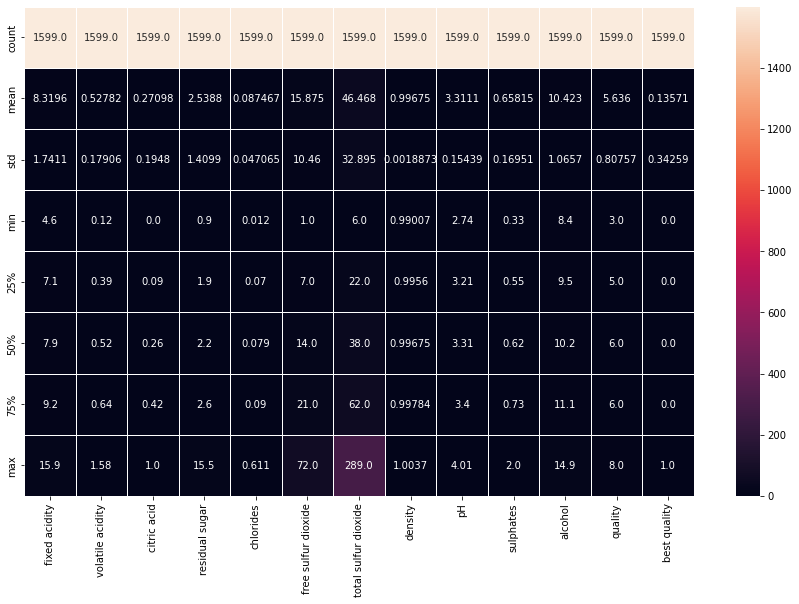

In [14]:
plt.figure(figsize =  (15,9))
sns.heatmap(data.describe(),annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.5')

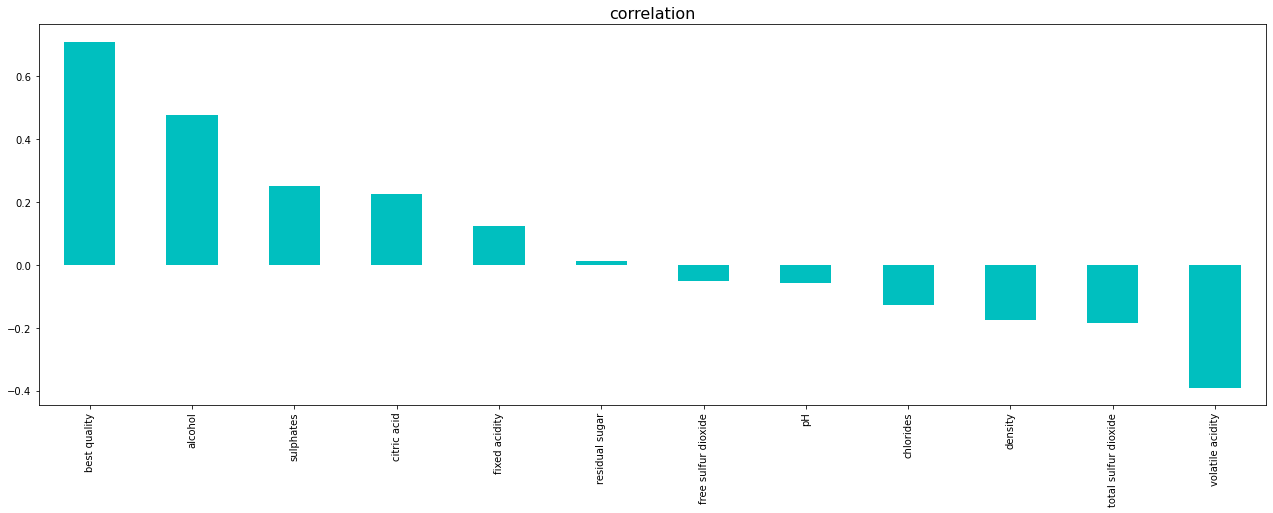

In [15]:
plt.figure(figsize=(22,7))
data.corr()['quality'].sort_values(ascending = False).drop(["quality"]).plot(kind = "bar", color = "c")
plt.title("correlation",fontsize = 16)
plt.show()

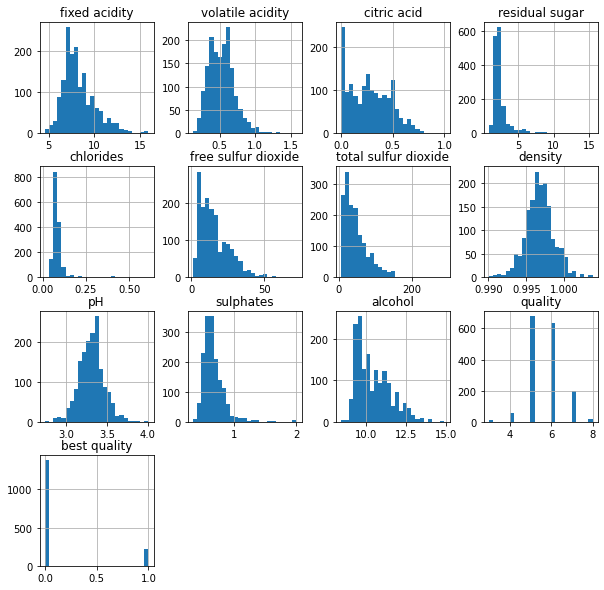

In [16]:

data.hist(bins=25,figsize=(10,10))
plt.show()

#  ploting quality vs all other  variables , also shows how much one variable affects another 

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

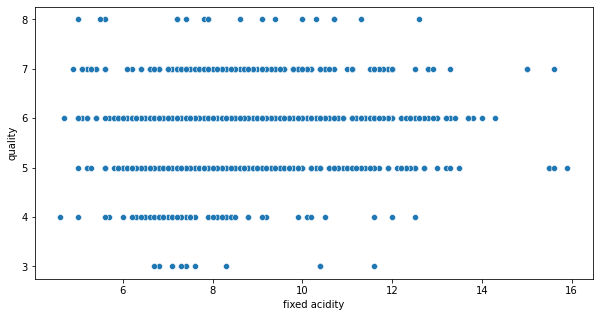

In [17]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "fixed acidity" , y = "quality" , data = data)

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

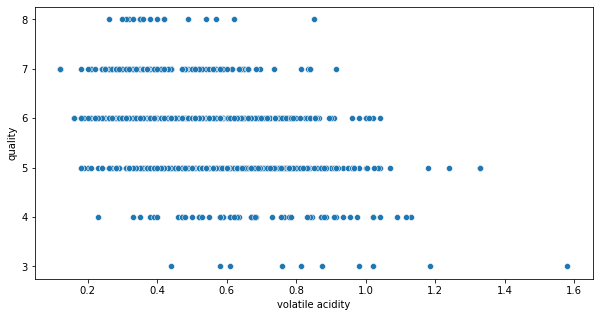

In [18]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "volatile acidity" , y = "quality" , data = data)

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

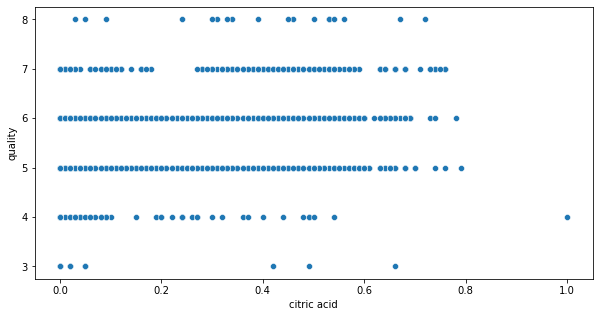

In [19]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "citric acid" , y = "quality" , data = data)

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

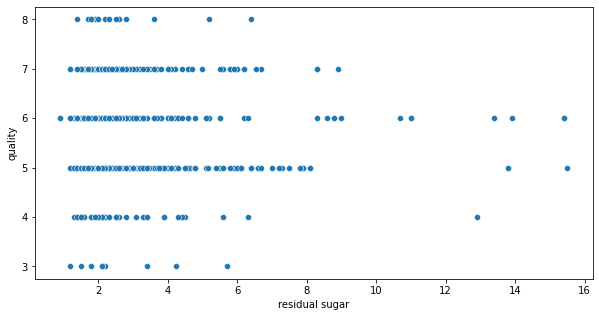

In [20]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "residual sugar" , y = "quality" , data = data)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

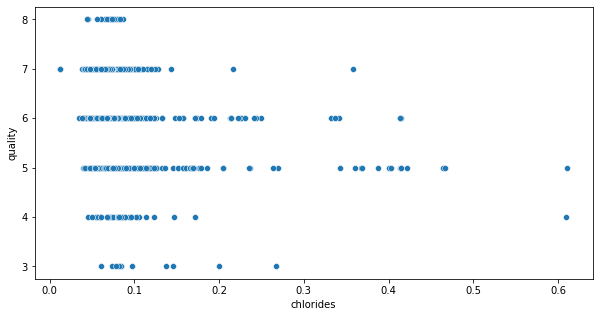

In [21]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "chlorides" , y = "quality" , data = data)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

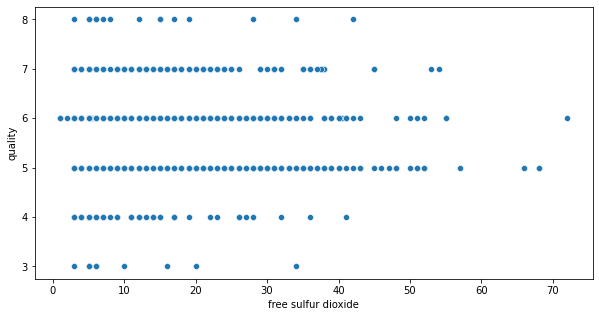

In [22]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "free sulfur dioxide" , y = "quality" , data = data)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

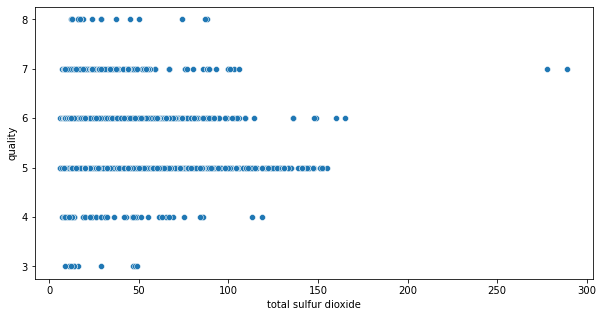

In [23]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "total sulfur dioxide" , y = "quality" , data = data)

<AxesSubplot:xlabel='density', ylabel='quality'>

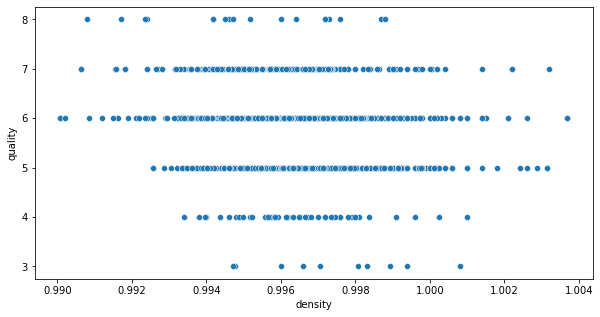

In [24]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "density" , y = "quality" , data = data)

<AxesSubplot:xlabel='pH', ylabel='quality'>

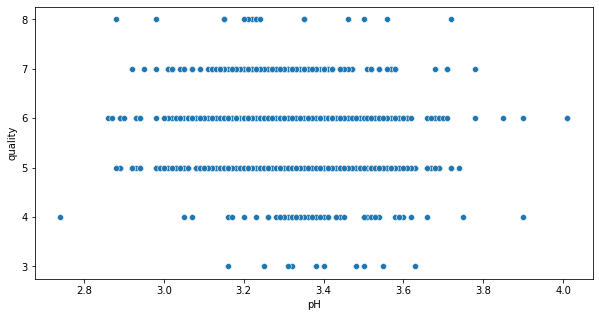

In [25]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "pH" , y = "quality" , data = data)

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

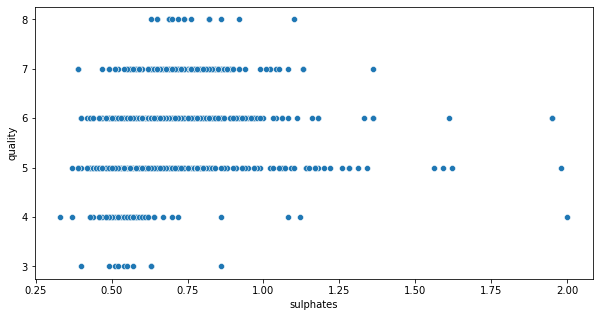

In [26]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "sulphates" , y = "quality" , data = data)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

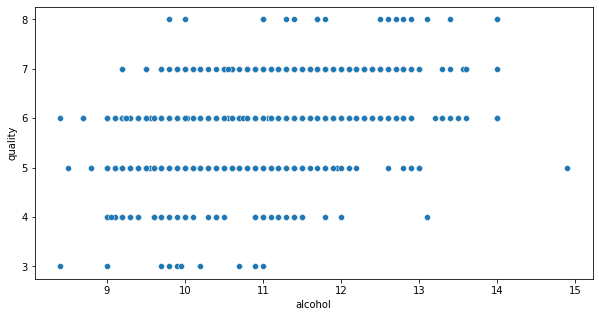

In [27]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "alcohol" , y = "quality" , data = data)

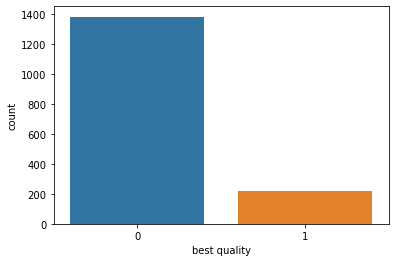

In [29]:
sns.countplot(x= "best quality", data =data)
plt.show()

# correllation

In [32]:
cor = data.corr()

<AxesSubplot:>

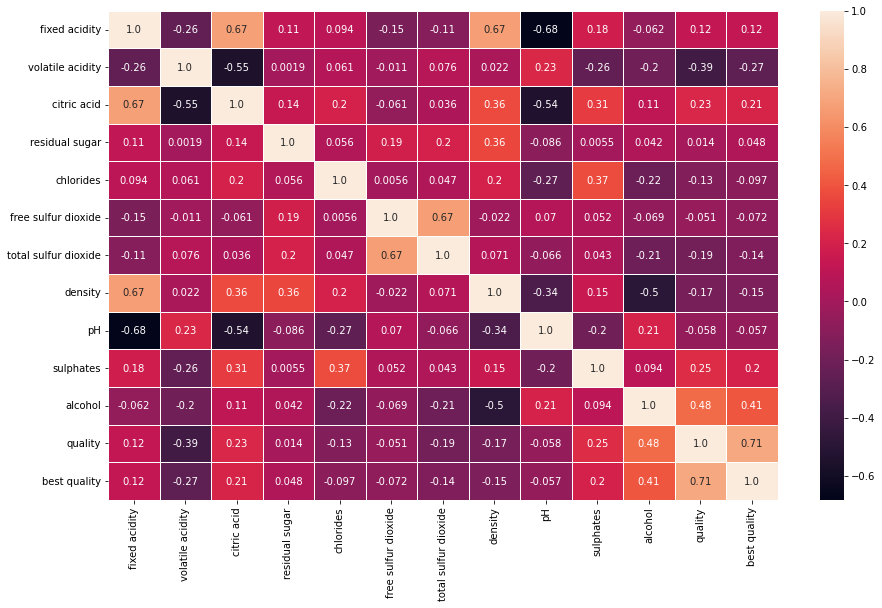

In [33]:
plt.figure(figsize =  (15,9))
sns.heatmap(cor,annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.2')

In [36]:
for a in range(len(data.corr().columns)):
    for b in range(a):
        if abs(data.corr().iloc[a,b]) >0.68:
            name = data.corr().columns[a]
            print(name)

pH
best quality


In [35]:
data.drop(["total sulfur dioxide"] , axis = 1 , inplace = True)

In [36]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0


# outliners

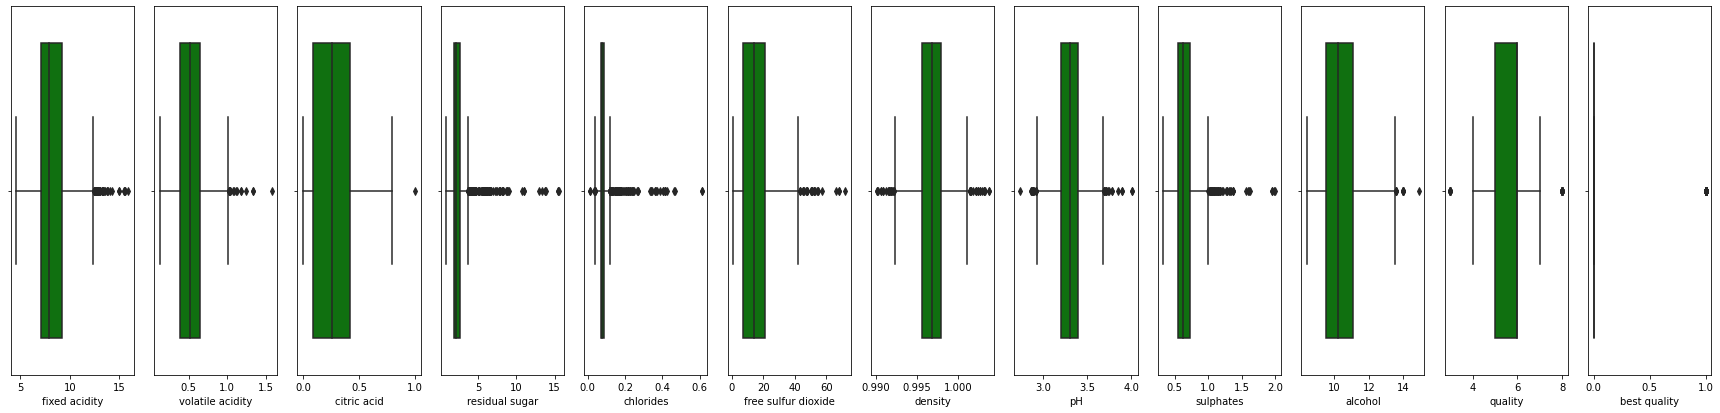

In [37]:
column = data.columns.values
ncol = 12
nrows = 158
plt.figure(figsize = (2*ncol,75*ncol))
for i in range ( 0 ,len(column)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[column[i]],color ="green",orient = "h")    
    plt.tight_layout()

In [38]:
data.skew()

fixed acidity          0.982751
volatile acidity       0.671593
citric acid            0.318337
residual sugar         4.540655
chlorides              5.680347
free sulfur dioxide    1.250567
density                0.071288
pH                     0.193683
sulphates              2.428672
alcohol                0.860829
quality                0.217802
best quality           2.129363
dtype: float64

# skewness graph

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

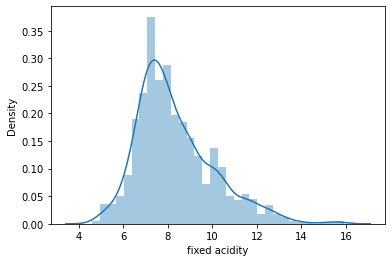

In [39]:
sns.distplot (data["fixed acidity"])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

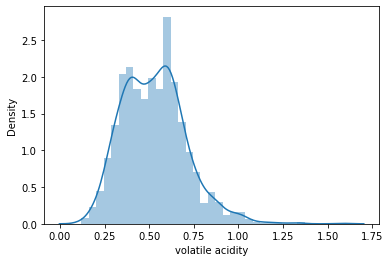

In [40]:
sns.distplot (data["volatile acidity"])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

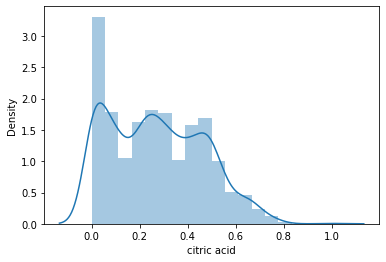

In [41]:
sns.distplot (data["citric acid"])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

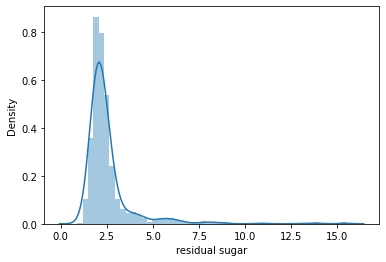

In [42]:
sns.distplot (data["residual sugar"])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

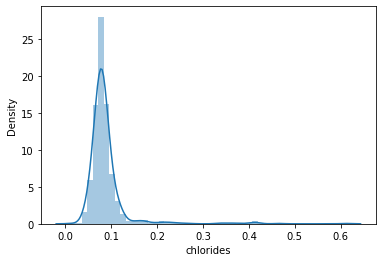

In [43]:
sns.distplot (data["chlorides"])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

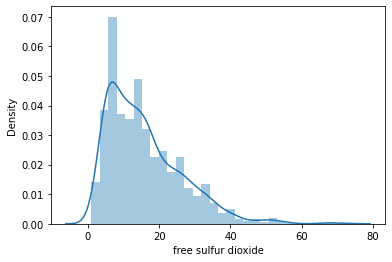

In [44]:
sns.distplot (data["free sulfur dioxide"])

<AxesSubplot:xlabel='density', ylabel='Density'>

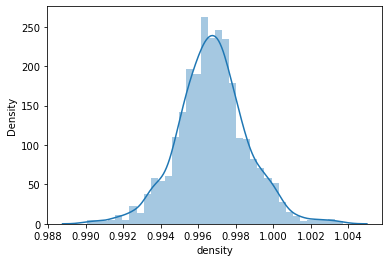

In [45]:
sns.distplot (data["density"])

<AxesSubplot:xlabel='pH', ylabel='Density'>

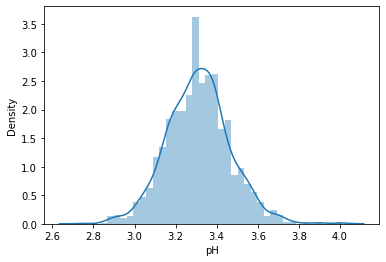

In [46]:
sns.distplot (data["pH"])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

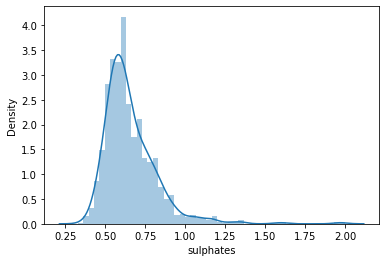

In [47]:
sns.distplot (data["sulphates"])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

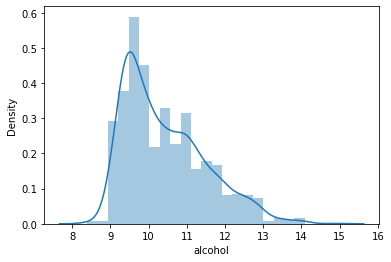

In [48]:
sns.distplot (data["alcohol"])

<AxesSubplot:xlabel='quality', ylabel='Density'>

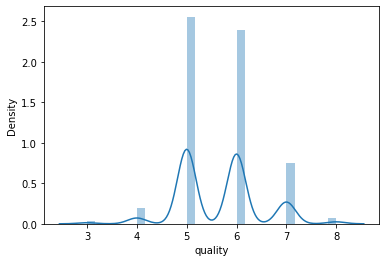

In [49]:
sns.distplot (data["quality"])

<AxesSubplot:xlabel='best quality', ylabel='Density'>

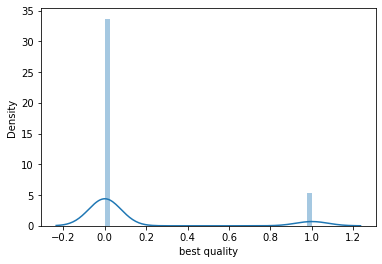

In [50]:
sns.distplot (data["best quality"])

# correlation with quality 

In [51]:
data.corr()["quality"]

fixed acidity          0.124052
volatile acidity      -0.390558
citric acid            0.226373
residual sugar         0.013732
chlorides             -0.128907
free sulfur dioxide   -0.050656
density               -0.174919
pH                    -0.057731
sulphates              0.251397
alcohol                0.476166
quality                1.000000
best quality           0.710196
Name: quality, dtype: float64

In [52]:
data.drop(["quality"],axis = 1 , inplace = True)

In [53]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,0


#   Deleting  Outliers

In [54]:
from scipy.stats import zscore

In [55]:
import numpy as np


In [56]:
z = np.abs(zscore(data))
data.shape

(1599, 11)

In [57]:
threshold = 3
print(np.where(z>3))

(array([  13,   14,   15,   17,   17,   19,   33,   38,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        120,  126,  127,  142,  144,  147,  151,  151,  151,  151,  163,
        164,  169,  169,  181,  199,  226,  226,  240,  243,  244,  258,
        258,  274,  281,  291,  324,  325,  339,  340,  347,  374,  381,
        391,  396,  396,  400,  400,  442,  442,  451,  467,  480,  480,
        494,  544,  554,  554,  555,  555,  557,  557,  568,  584,  588,
        595,  608,  614,  639,  649,  652,  652,  652,  672,  690,  692,
        692,  695,  723,  724,  730,  754,  776,  777,  795,  821,  836,
        837,  889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043,
       1051, 1051, 1071, 1074, 1079, 1081, 1111, 1114, 1131, 1154, 1165,
       1175, 1186, 1231, 1235, 1244, 1244, 1260, 1269, 1269, 1270, 1270,
       1288, 1289, 1295, 1296, 1299, 1300, 1312, 1316, 1319, 1319, 1321,
       1358, 1367, 1370, 1370, 1372, 1372, 1374, 1

In [58]:
len(np.where(z>3)[0])

167

In [59]:
df = data[(z<3).all(axis=1)]

In [60]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,0


# separting X/input data and y/output  data 

In [61]:
x = df.iloc[:,:-1]

In [62]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2


In [63]:
y = df.iloc[:,-1]

In [64]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: best quality, Length: 1467, dtype: int64

In [65]:
from sklearn.preprocessing import  power_transform
x =  power_transform(x,method = 'yeo-johnson')

In [66]:
x= pd.DataFrame(x)

In [67]:
x

,0,1,2,3,4,5,6,7,8,9
0,-0.469632,1.037678,-1.524816,-0.607905,-0.149233,-0.247034,0.628900,1.364078,-0.585981,-1.110127
1,-0.172556,1.890197,-1.524816,0.648444,0.977337,1.079463,0.053301,-0.817011,0.455404,-0.524401
2,-0.172556,1.335335,-1.246815,0.208367,0.710820,0.230565,0.168749,-0.380254,0.224276,-0.524401
3,1.573091,-1.557421,1.442308,-0.607905,-0.211261,0.431470,0.743529,-1.112315,-0.389092,-0.524401
4,-0.469632,1.037678,-1.524816,-0.607905,-0.149233,-0.247034,0.628900,1.364078,-0.585981,-1.110127
...,...,...,...,...,...,...,...,...,...,...
1462,-1.556393,0.507498,-0.982396,-0.372482,0.615759,1.516940,-1.051697,0.956085,-0.389092,0.289365
1463,-1.886424,0.224724,-0.854921,0.033044,-1.123851,1.880250,-0.922982,1.431450,0.994432,0.903435
1464,-1.452344,-0.010828,-0.669262,0.208367,-0.149233,1.340373,-0.561326,0.749633,0.932607,0.744659
1465,-1.886424,0.751645,-0.730428,-0.372482,-0.211261,1.516940,-0.718625,1.765681,0.669923,-0.030789


In [68]:
x.skew()

0    0.019013
1    0.005432
2    0.017101
3   -0.003090
4   -0.113639
5   -0.022079
6   -0.000879
7   -0.000099
8    0.020899
9    0.109550
dtype: float64

In [88]:
np.var(x)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
from sklearn.model_selection import  train_test_split

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
ln = LogisticRegression()
ln

LogisticRegression()

# train_test_split

In [103]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .30)
    ln.fit(x_train,y_train)
    pred_train = ln.predict(x_train)
    pred_test = ln.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")


at random state 0 model preforms best
at random_state =   0
training score at 0 is  88.59649122807018
 testing  score is  0 is 87.07482993197279 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  88.30409356725146
 testing  score is  1 is 90.47619047619048 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  87.32943469785575
 testing  score is  2 is 90.9297052154195 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  87.91423001949317
 testing  score is  3 is 90.24943310657596 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  88.88888888888889
 testing  score is  4 is 88.43537414965986 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  88.69395711500975
 testing  score is  5 is 88.66213151927438 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  89.47368421052632
 testing  score i

training score at 62 is  87.91423001949317
 testing  score is  62 is 89.56916099773242 

at random state 63 model preforms best
at random_state =   63
training score at 63 is  89.18128654970761
 testing  score is  63 is 87.98185941043084 

at random state 64 model preforms best
at random_state =   64
training score at 64 is  88.40155945419103
 testing  score is  64 is 88.20861678004536 

at random state 65 model preforms best
at random_state =   65
training score at 65 is  88.40155945419103
 testing  score is  65 is 88.43537414965986 

at random state 66 model preforms best
at random_state =   66
training score at 66 is  88.40155945419103
 testing  score is  66 is 88.66213151927438 

at random state 67 model preforms best
at random_state =   67
training score at 67 is  88.10916179337231
 testing  score is  67 is 89.79591836734694 

at random state 68 model preforms best
at random_state =   68
training score at 68 is  89.37621832358674
 testing  score is  68 is 86.39455782312925 

at ra

In [104]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = .30,random_state =7)

In [105]:
ln.fit(x_train,y_train)

LogisticRegression()

In [106]:
ln.coef_

array([[ 0.27152401, -0.41632018, -0.30809121,  0.14769396, -0.1427232 ,
        -0.27092014, -0.18275888, -0.33638071,  0.82628774,  1.29982677]])

In [107]:
ln.intercept_

array([-2.8386895])

In [108]:
ln.score(x_train,y_train)

0.8762183235867447

In [109]:
print(accuracy_score(y_test,pred_test))

0.8526077097505669


In [110]:
from sklearn.metrics import classification_report

In [111]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       392
           1       0.26      0.18      0.22        49

    accuracy                           0.85       441
   macro avg       0.58      0.56      0.57       441
weighted avg       0.83      0.85      0.84       441



# cross validation

In [117]:
pred_test = ln.predict(x_test)
from sklearn.model_selection  import cross_val_score

In [118]:
ls = accuracy_score(y_test,pred_test)

In [119]:
ls

0.9047619047619048

In [126]:
for j in  range  (2,10):
    score = cross_val_score(ln,x,y,cv = j)
    Lscore = score.mean()
    print("at  cv ",j)
    print("cross validation score is", Lscore*100)
    print("accuracy_score ",ls*100 )
    print("\n")

at  cv  2
cross validation score is 85.54687354792183
accuracy_score  90.47619047619048


at  cv  3
cross validation score is 87.38922972051807
accuracy_score  90.47619047619048


at  cv  4
cross validation score is 87.04958979169459
accuracy_score  90.47619047619048


at  cv  5
cross validation score is 87.52571335701518
accuracy_score  90.47619047619048


at  cv  6
cross validation score is 86.97836511653841
accuracy_score  90.47619047619048


at  cv  7
cross validation score is 87.52302835009601
accuracy_score  90.47619047619048


at  cv  8
cross validation score is 87.66259800427656
accuracy_score  90.47619047619048


at  cv  9
cross validation score is 87.52556237218813
accuracy_score  90.47619047619048




In [129]:
cross_val = cross_val_score(ln,x,y,cv = 7).mean()

In [130]:
cross_val

0.8752302835009601

In [131]:
print("accuracy score is ", ls , "\n" , "cross validation score is " , cross_val)

accuracy score is  0.9047619047619048 
 cross validation score is  0.8752302835009601


# roc_auc

In [134]:

from sklearn.metrics  import roc_curve,auc

In [136]:
fpr , tpr , threshold = roc_curve(y_test,pred_test)

In [137]:
roc_auc  =  auc(fpr,tpr)

In [138]:
roc_auc

0.7321428571428571

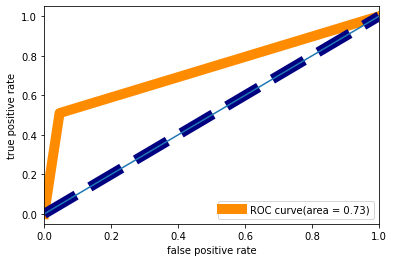

In [149]:
plt.figure()
plt.plot(fpr,tpr,color ="darkorange",lw = 10, label = "ROC curve(area = %0.2f)"%roc_auc)
plt.plot([0,1],[0,1]  , color = "navy" , lw = 10 ,  linestyle = "--" )
plt.xlim ([0.0 ,1.0] )
plt.plot([0.0 , 1.0])
plt.xlabel("false positive rate" )
plt.ylabel("true positive rate" )

plt.legend(loc="lower right")


plt.show()

# orignal  value vs predicted 

In [150]:
original = np.array(y_test)

In [152]:
predicted = np.array(ln.predict(x_test))

In [154]:
data_frame = pd.DataFrame({"original": original, "predicted": predicted})

In [157]:
data_frame

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


  # saving 

In [38]:
import pickle
filename = "wine_quality.pkl"

In [42]:
pickle.dump(ln,open(filename,"wb"))

In [44]:
filename

'wine_quality.pkl'